In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

sber_data = pd.read_csv('data/sber_data.csv')
sber_data['price_doc'].max()

import pandas as pd
import numpy as np




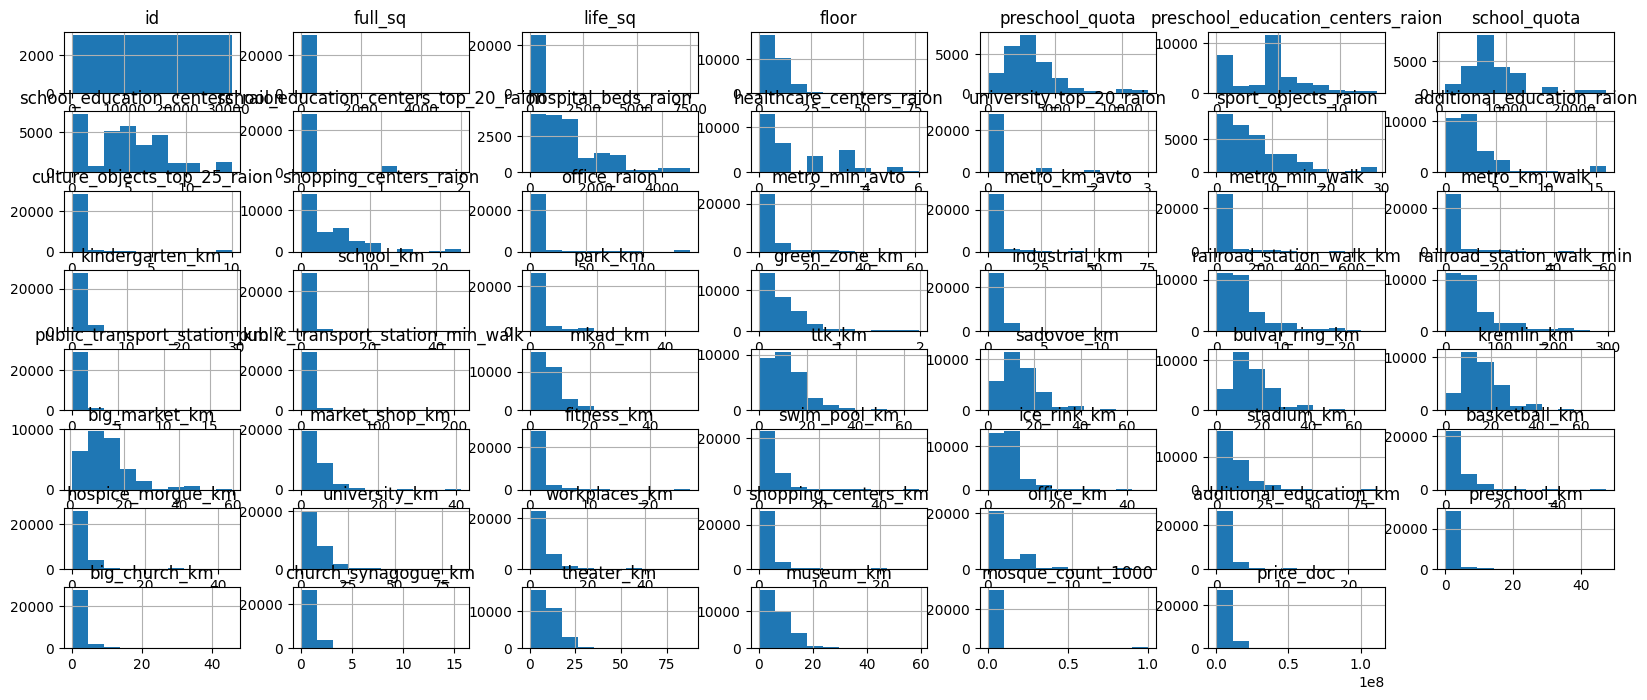

In [10]:
cols = sber_data.columns
sber_data[cols].hist(figsize=(20, 8));

Index(['id', 'full_sq', 'life_sq', 'floor', 'sub_area', 'preschool_quota',
       'preschool_education_centers_raion', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'oil_chemistry_raion', 'railroad_terminal_raion',
       'nuclear_reactor_raion', 'metro_min_avto', 'metro_km_avto',
       'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km',
       'park_km', 'green_zone_km', 'industrial_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_road1_1line', 'big_market_km',
       'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km',
       'stadium_km', 'basketball_km', 'hospice_morgue_km', 'university_km',
       'workplaces_km', 'shopping_centers_km', 'office_km',
       'additional_education_km', 'preschool_km', 'big_church_km',
       'church_synagogue_km', 'theater_km', 'museum_km', 'ecology',
       'mosque_count_1000', 'price_doc'],
      dtype='object')

Задание 2.4

Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

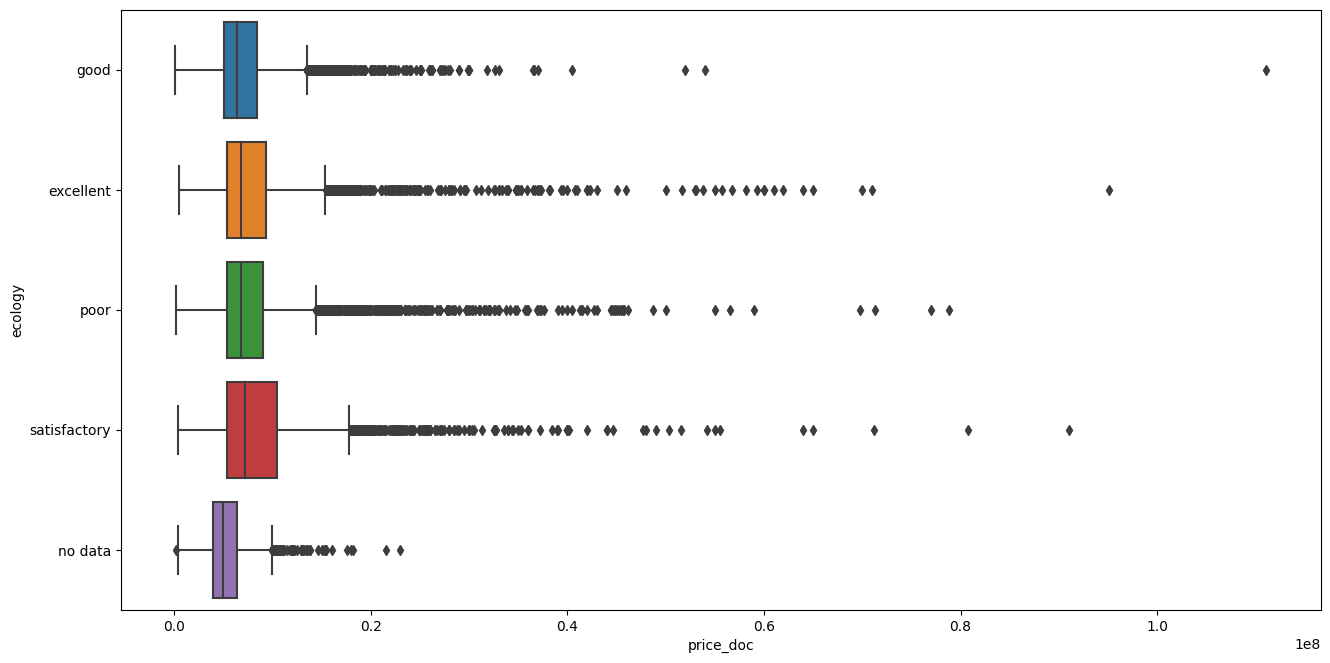

In [2]:
fig = plt.figure(figsize = (12,6))
axes = fig.add_axes([0,0,1,1])
b = sns.boxplot(
    sber_data,
    y='ecology',
    x='price_doc',
    
    ax=axes
)


Задание 2.5

Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km). Выберите все верные утверждения.

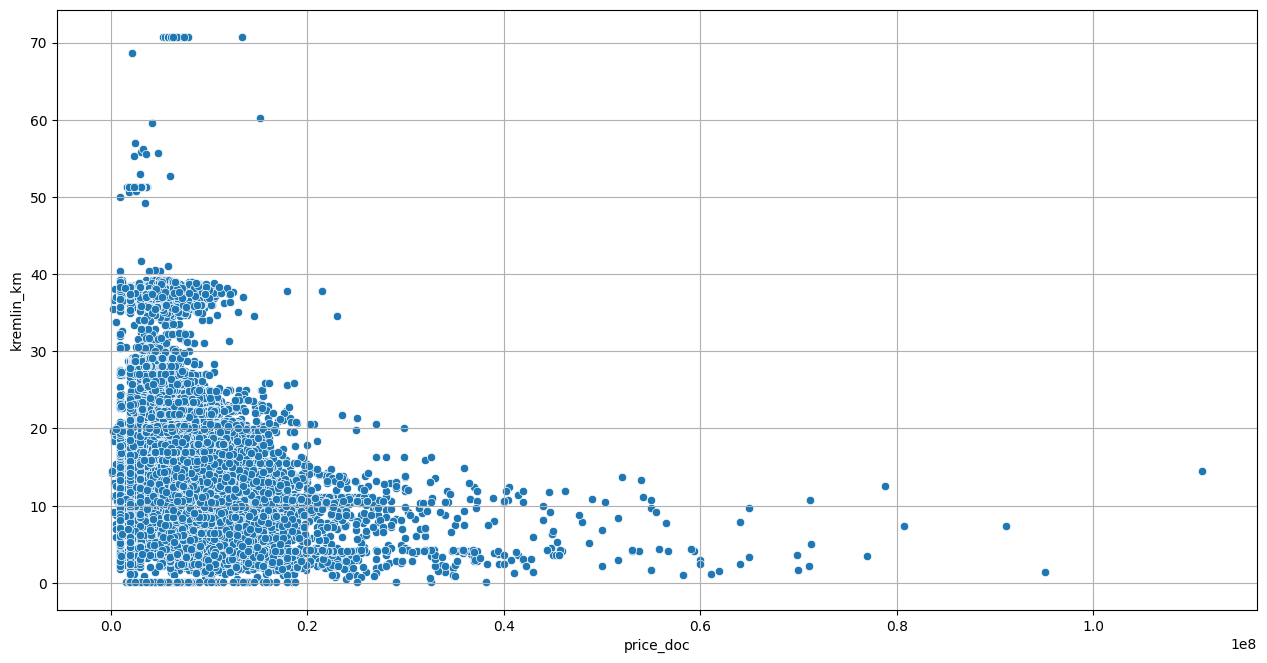

In [3]:
fig = plt.figure(figsize = (12,6))
axes = fig.add_axes([0,0,1,1])
b = sns.scatterplot(
    sber_data,
    y='kremlin_km',
    x='price_doc',
    
    ax=axes
)
b.grid()

In [4]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

In [5]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', right=3.5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


Задание 6.5

Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. 

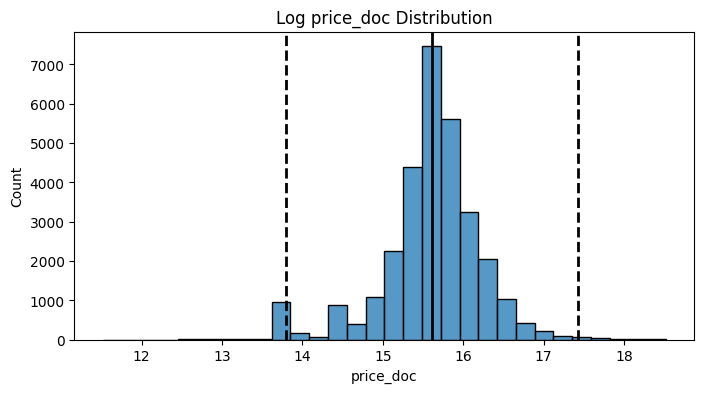

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc , bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log price_doc Distribution');

Задание 6.6

Найдите потенциальные выбросы с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в в обе стороны распределения. Сколько выбросов вы получили?

In [7]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', left=3.7, right=3.7, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


Задание 6.7

Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

In [8]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
        
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc',left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379
